%load_ext autoreload
%autoreload 2

In [5]:
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories,
                                  shuffle=True, random_state=42)

In [6]:
import pandas as pd

# my functions
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

In [7]:
# add category to the dataframe
X['category'] = twenty_train.target
# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

###### Exercise 2 (take home):
Experiment with other querying techniques using pandas dataframes

In [8]:
X.iloc[0]

text             From: sd345@city.ac.uk (Michael Collier) Subje...
category                                                         1
category_name                                        comp.graphics
Name: 0, dtype: object

In [11]:
X.iloc[0]={'text':X.iloc[0].text,'category':2}


In [12]:
X.iloc[0] ## change value of some element

text             From: sd345@city.ac.uk (Michael Collier) Subje...
category                                                         2
category_name                                                  NaN
Name: 0, dtype: object

### Exercise 5 (take home)
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.

In [3]:
import numpy as np
import pandas as pd
NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [4]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

answer : id A B C have same value if we look at the form(NA_df)
but we get different results after calling isnull function
because id C its value NaN is string not null type so after calling function isnull id C its result is False
id D E also have same reason that have different results
id F its result is also like before  its space is not lose data that is a string which value is space 

### Exercise 6 (take home):
Notice any changes to the X dataframe? What are they? Report every change you noticed as compared to the previous state of X. Feel free to query and look more closely at the dataframe for these changes.

In [8]:
X[:10]

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med
9,From: libman@hsc.usc.edu (Marlena Libman) Subj...,2,sci.med


In [9]:
X_sample = X.sample(n=1000) #random state
len(X_sample)
X_sample[0:4]

,text,category,category_name
587,From: tedr@athena.cs.uga.edu (Ted Kalivoda) Su...,3,soc.religion.christian
1355,From: tas@pegasus.com (Len Howard) Subject: Re...,2,sci.med
757,From: bluelobster+@cmu.edu (David O Hunt) Subj...,3,soc.religion.christian
889,From: mmatusev@radford.vak12ed.edu (Melissa N....,2,sci.med


In [12]:
X[587:588]

,text,category,category_name
587,From: tedr@athena.cs.uga.edu (Ted Kalivoda) Su...,3,soc.religion.christian


answer:maybe i misunderstand something or that's true
because i didn't find any changed and the function sample also not change anything(i guess because the official document don't mention about if you call this function it will  change the original dataframe   )

### >>> Exercise 8 (take home):
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for.

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
print(X.category_name.value_counts())

soc.religion.christian    599
sci.med                   594
comp.graphics             584
alt.atheism               480
Name: category_name, dtype: int64


In [21]:
print(X_sample.category_name.value_counts())

sci.med                   273
soc.religion.christian    262
comp.graphics             259
alt.atheism               206
Name: category_name, dtype: int64


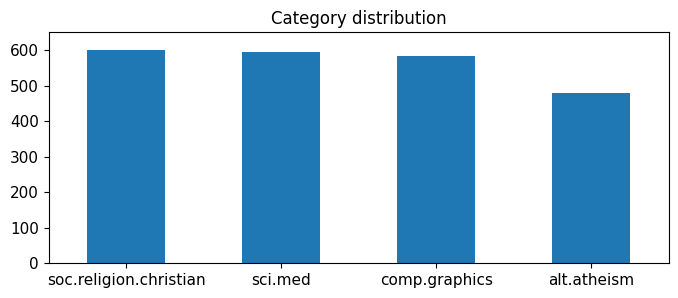

In [16]:
ax=X.category_name.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, 650],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

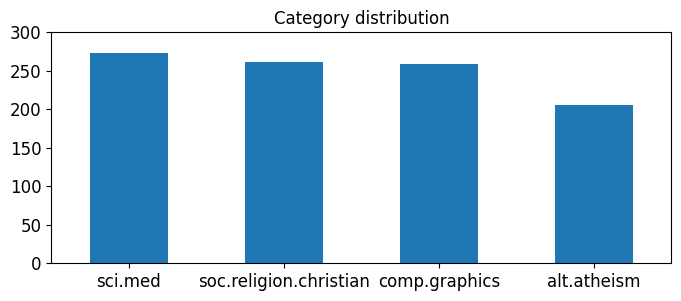

In [17]:
ax=X_sample.category_name.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, 300], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

In [30]:
df=pd.concat([X_sample.category_name.value_counts(),X.category_name.value_counts()],axis=1)
df.columns=['sample','original']

<AxesSubplot: title={'center': 'Category distribution'}>

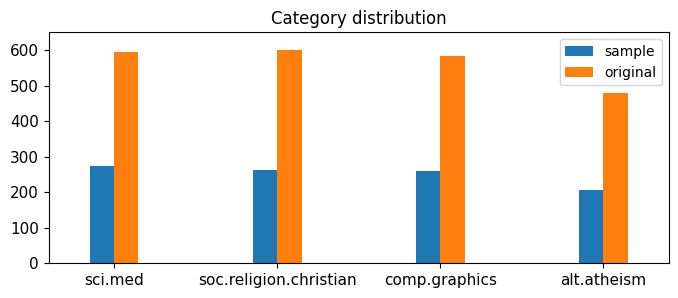

In [36]:
df.plot(kind = 'bar',title = 'Category distribution',ylim = [0, 650],rot = 0, fontsize = 11, figsize = (8,3),width=0.3)

### >>> Exercise 10 (take home):
We said that the 1 at the beginning of the fifth record represents the 00 term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [37]:
import nltk

In [38]:
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))

In [39]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix

In [45]:
print(X_counts[4][:100].toarray())

[[1 0 0 ... 0 0 0]]


ans

In [69]:
temp=X_counts[4,:100].toarray()
for i in range(100):
    if temp[0][i]==1:
        print(count_vect.get_feature_names_out()[i:i+1])

['00']
['01']


### >>> Exercise 11 (take home):
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of 1 in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

In [74]:
X_counts[4,:][0].toarray()

array([[1, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [95]:
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[10000:10100]]
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(X.index)[90:100]]
plot_z = X_counts[90:100, 10000:10100].toarray()

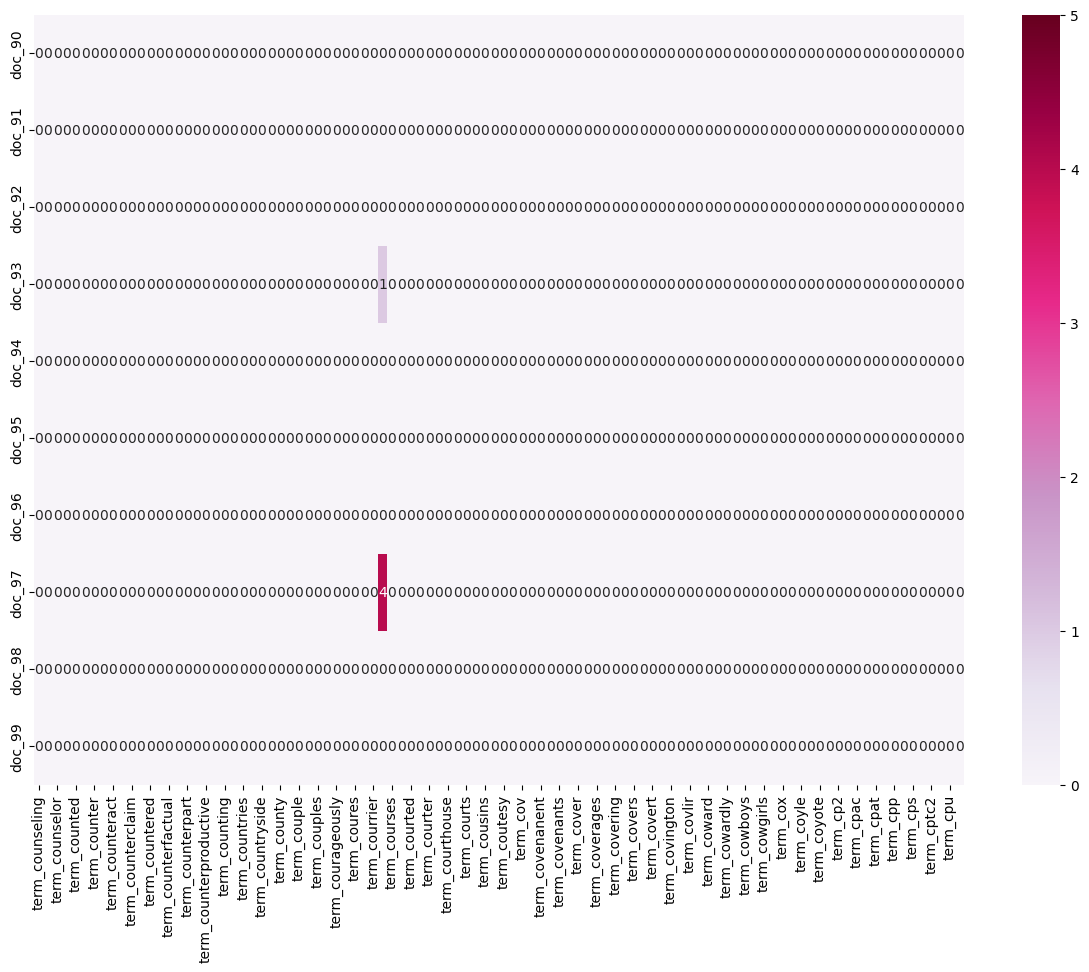

In [96]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(15, 10))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=5, annot=True)

i don't think this is a good answer maybe i can find some high frequency word to show (i just change range and vmax )  
of course i can draw  a sample 

### >>> Exercise 12 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

In [97]:
from sklearn.decomposition import PCA
X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())
X_reduced.shape

(2257, 3)

In [98]:
categories

['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

In [99]:
from mpl_toolkits.mplot3d.axes3d import Axes3D

In [108]:
fig=plt.figure()
ax=Axes3D(fig)
ax.scatter(X_reduced[...,0],X_reduced[...,1],X_reduced[...,2],c='r', label='airplane')
plt.show()

<Figure size 640x480 with 0 Axes>

<Figure size 2500x1000 with 0 Axes>

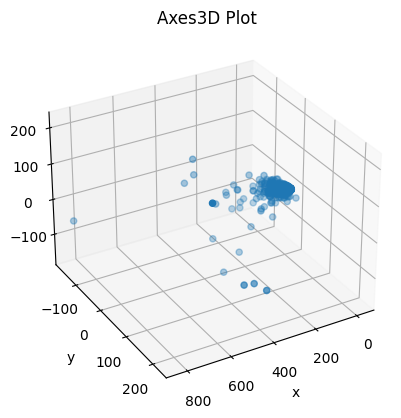

In [114]:
import numpy as np
import matplotlib.pyplot as plt
ax = plt.axes(projection='3d',azim=60)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.scatter(X_reduced[...,0],X_reduced[...,1], X_reduced[...,2])
plt.title('Axes3D Plot')
plt.show()

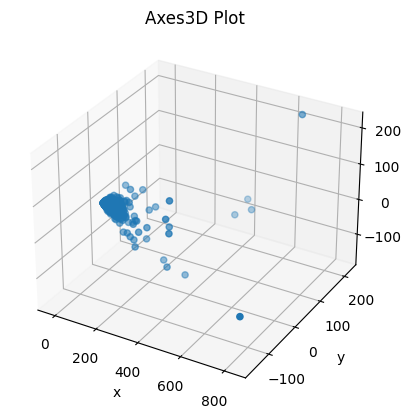

In [116]:
ax = plt.axes(projection='3d',azim=-60)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.scatter(X_reduced[...,0],X_reduced[...,1], X_reduced[...,2])
plt.title('Axes3D Plot')
plt.show()

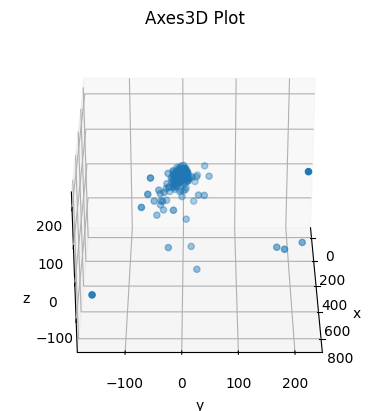

In [117]:
ax = plt.axes(projection='3d',azim=0)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.scatter(X_reduced[...,0],X_reduced[...,1], X_reduced[...,2])
plt.title('Axes3D Plot')
plt.show()

answer:most of points are concentrated and we always can find some points far away from the concentrated point
three views have same trend => there is concentrated point and some points a little distance from the concentrated point and far away from concentrated point have a little bit points

### >>> Exercise 13 (take home):
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [118]:
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

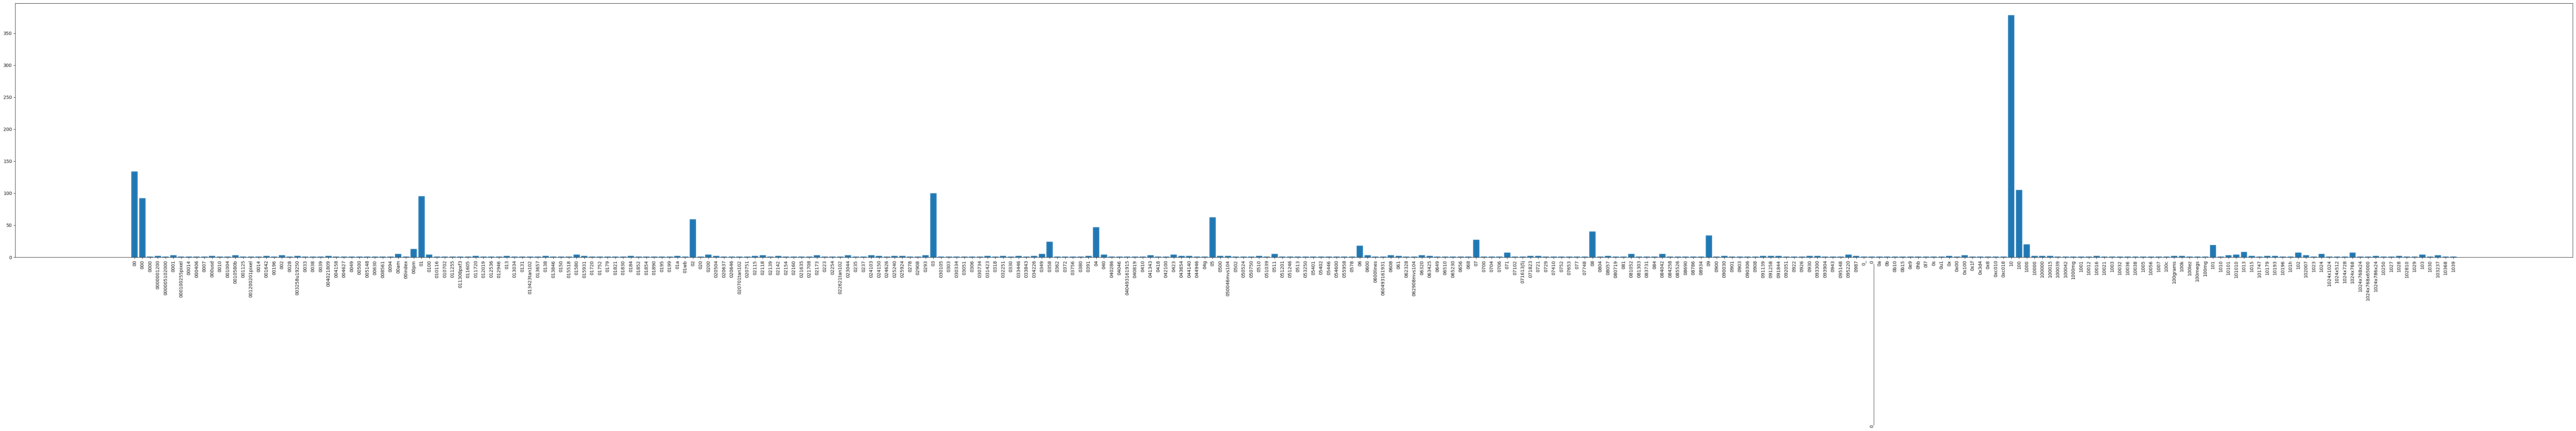

In [133]:
plt.subplots(figsize=(100, 10))
df=pd.DataFrame(term_frequencies[:300],index=count_vect.get_feature_names_out()[:300])
x=np.arange(300)
plt.bar(x,term_frequencies[:300])
plt.xticks(x,count_vect.get_feature_names_out()[:300],rotation=90)
plt.show()

### >>> Exercise 14 (take home):
The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise.

In [150]:
y_value,x_value=(list(t) for t in zip(*sorted(zip(term_frequencies,count_vect.get_feature_names_out()),reverse=True)))

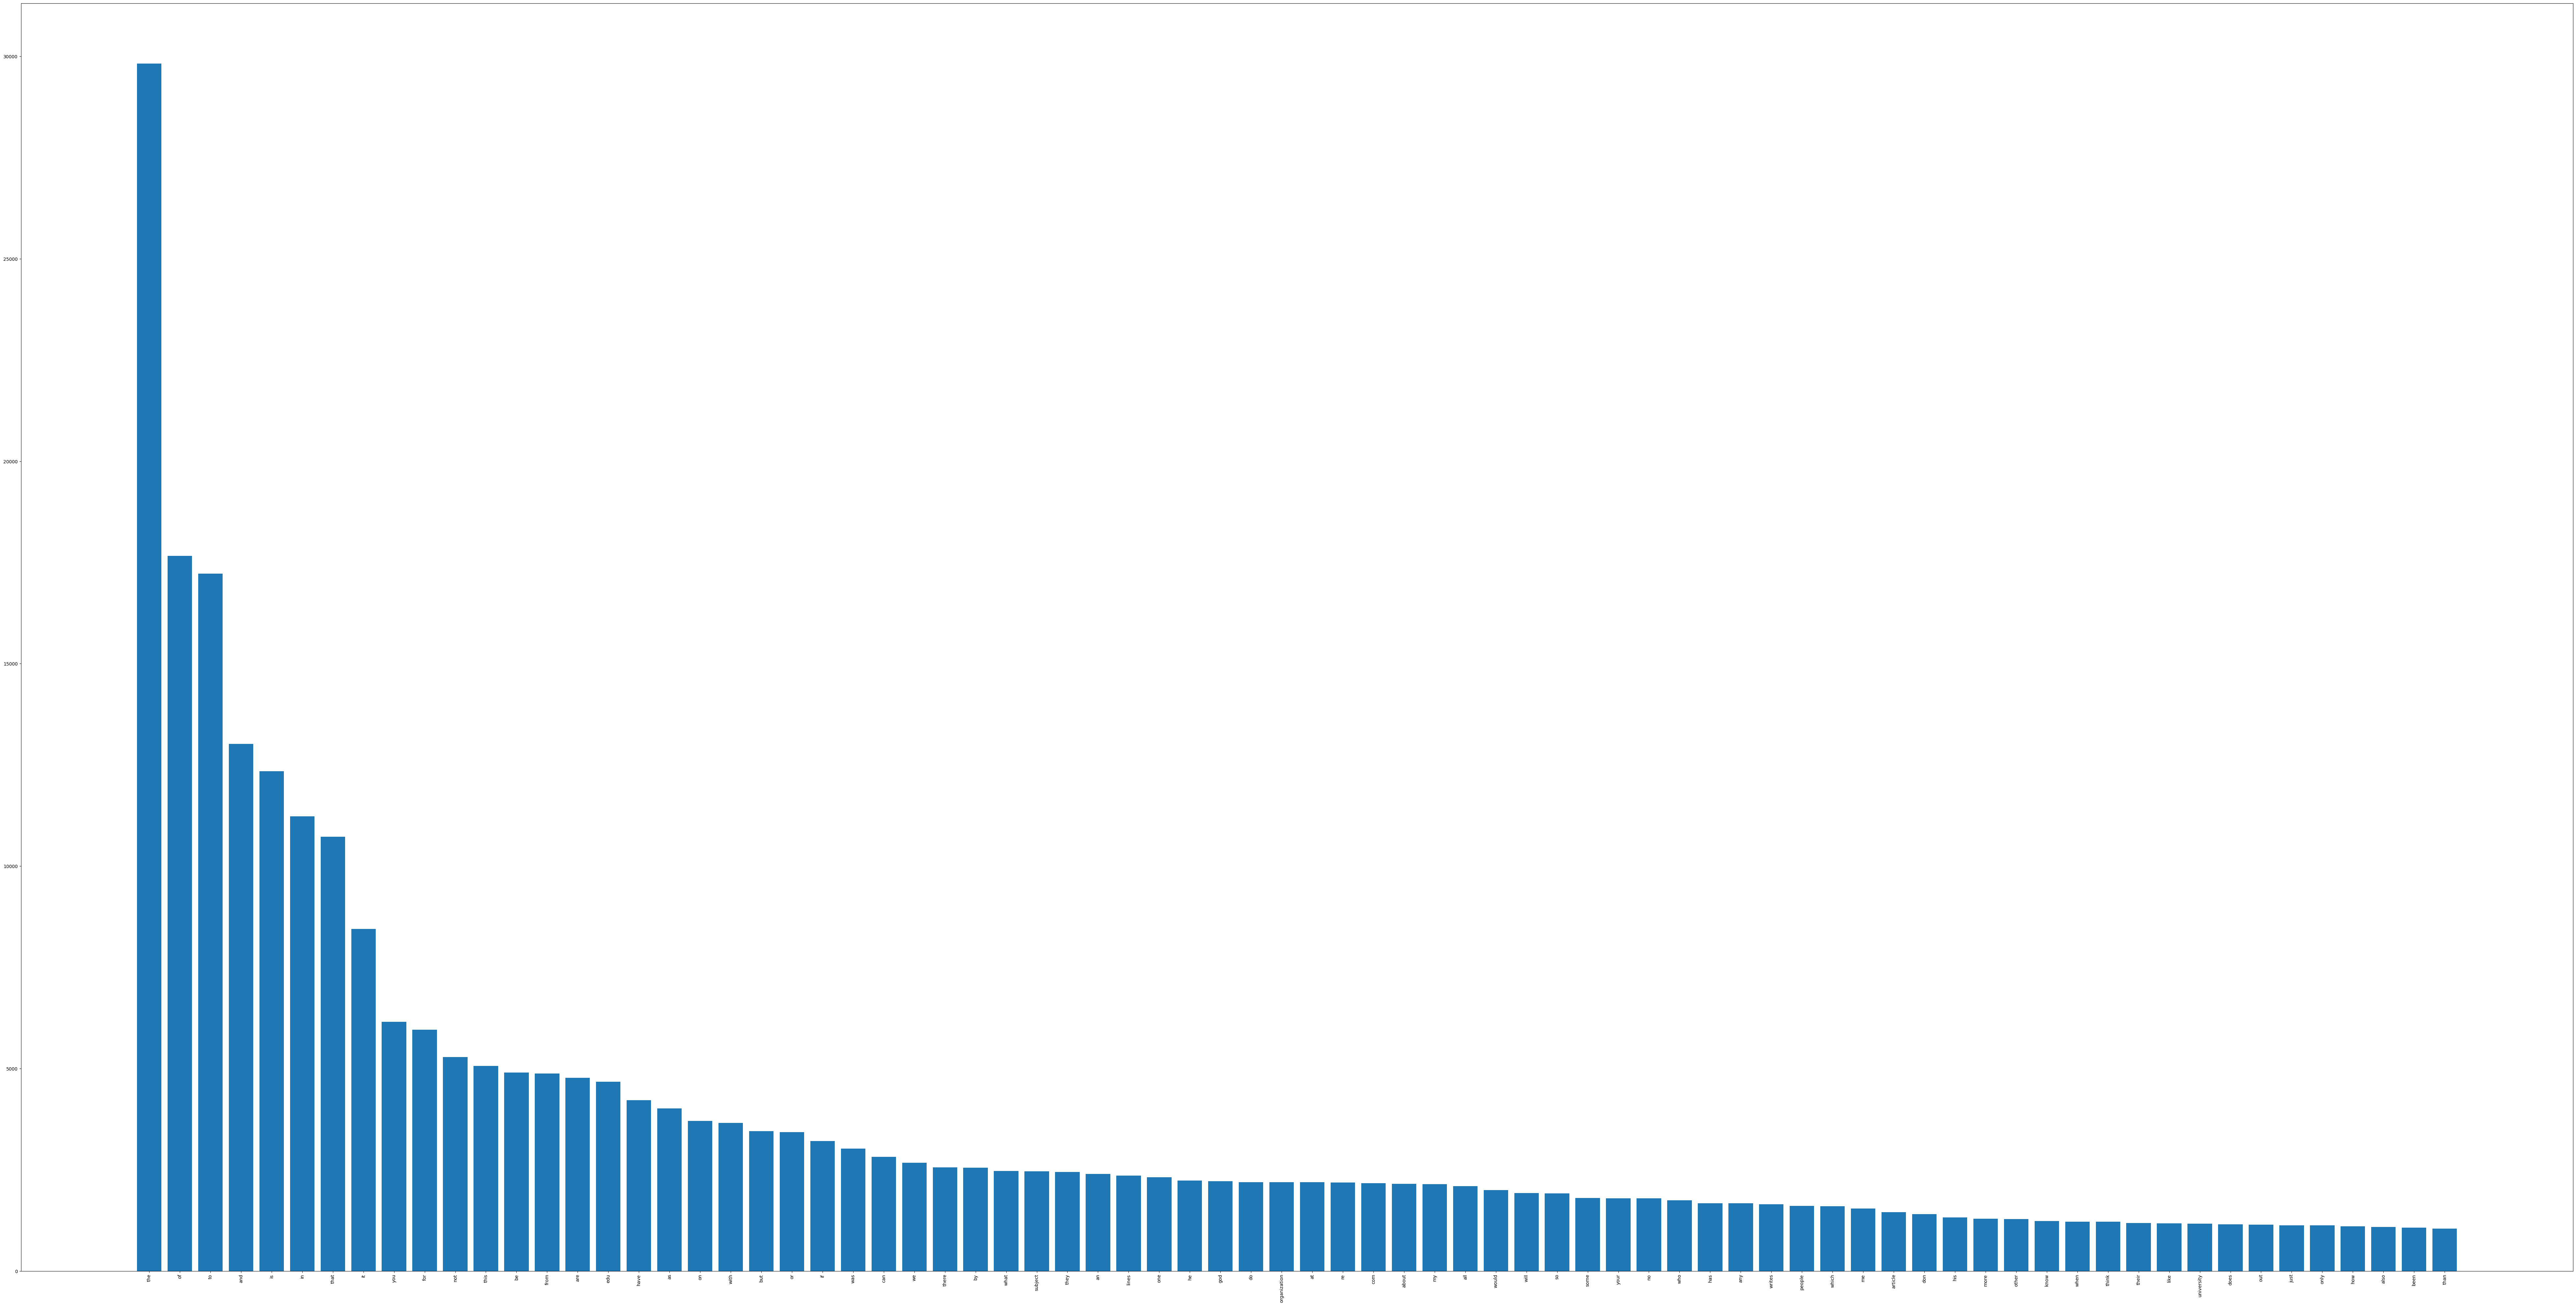

In [157]:
import math
x=np.arange(76)
plt.subplots(figsize=(100, 50))
plt.fontsize = 35
plt.bar(x,y_value[:76])
plt.xticks(x,x_value[:76],rotation=90)
plt.show()

### >>> Exercise 15 (take home):
Additionally, you can attempt to sort the terms on the x-axis by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called long tail (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below



i think i do the same things at Exercise 15 and i pick top76 from sorted frequencies array  
and i choose 76 is because 77th number is first number below 1000

### >>> Exercise 16 (take home):
Try to generate the binarization using the category_name column instead. Does it work?

In [162]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category_name)

LabelBinarizer()

In [160]:
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])
# add category to the dataframe
X['category'] = twenty_train.target
# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

In [163]:
X['bin_category_name'] = mlb.transform(X['category_name']).tolist()

In [165]:
X[0:15]

,text,category,category_name,bin_category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[0, 1, 0, 0]"
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[0, 1, 0, 0]"
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[0, 0, 0, 1]"
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[0, 0, 0, 1]"
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[0, 0, 0, 1]"
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian,"[0, 0, 0, 1]"
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian,"[0, 0, 0, 1]"
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med,"[0, 0, 1, 0]"
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med,"[0, 0, 1, 0]"
9,From: libman@hsc.usc.edu (Marlena Libman) Subj...,2,sci.med,"[0, 0, 1, 0]"


answer: yes